# import python lib

In [19]:
import pandas
import configparser
import psycopg2

# connect to database 

In [20]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [21]:
cur=conn.cursor()

# 1. Use pandas to display all the records in the student table.

In [22]:
sql_statement = """
                select * from gp23.student
               """

In [23]:
cur.execute (sql_statement)

In [9]:
df = pandas.read_sql_query(sql_statement,conn)
df[:]

,s_email,s_name,major
0,towneraf@dukes.jmu.edu,Aileen Towner,IA
1,hannahtaylor@dukes.jmu.edu,Hannah Taylor,IA
2,maddybuckley@dukes.jmu.edu,Maddy Buckely,Education
3,s1@dukes.jmu.edu,s1,IA\n


# 2. Display the teachers'names and the corresponding course names

In [24]:
sql_q2 = """
        select gp23.professor.p_name,
        gp23.course.c_name
        from gp23.professor
        inner join gp23.course
        on gp23.professor.p_email = gp23.course.p_email      
         """
            

In [11]:
df = pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,SuBin Wei,Data Mining
1,Kathleen Moore,Technology
2,Timothy Walton,Ethics
3,p1,Writing2
4,new_p,Writing
5,newprofs,new_c_name


# 3. Create a bar chart showingthe number of enrolled students byeach course number.

In [12]:
sql_q3 = """
        select num_course, 
        count (num_course) as enrolled
        from gp23.enroll_list
        group by num_course
        order by enrolled desc
        
        """

<AxesSubplot:xlabel='num_course'>

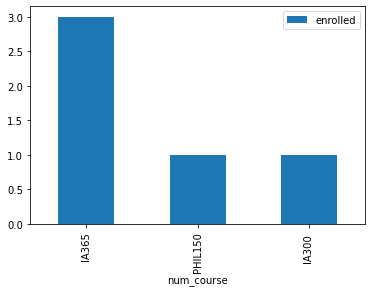

In [13]:
df = pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled', x='num_course')

# 4.  Create a bar chart showing the number of courses taught by each professor'sname

In [14]:
sql_q4 = """
        select professor.p_name, 
        count (gp23.course.c_name) as teaching_num
        from gp23.professor
        inner join gp23.course
        on gp23.professor.p_email = gp23.course.p_email
        group by professor.p_name 
        order by teaching_num desc
        """

<AxesSubplot:xlabel='p_name'>

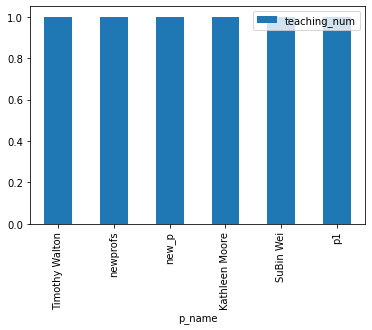

In [15]:
df = pandas.read_sql_query(sql_q4,conn)
df.plot.bar( y='teaching_num', x='p_name')

# 5. Add a new record of the new professor in the teacher table, and the corresponding new course record in the course table

In [50]:
sql_q5_professor = """
                    insert into gp23.professor (p_email,p_name,office)
                    values ('{}','{}','{}')  
                     """.format ('newprofs@jmu.edu', 'newprofs','newoffice')
                    
                 

In [51]:
cur.execute(sql_q5_professor)

IntegrityError: duplicate key value violates unique constraint "professor_pkey"
DETAIL:  Key (p_email)=(newprofs@jmu.edu) already exists.


In [52]:
conn.rollback()

In [ ]:
df = pandas.read_sql_query('select * from gp23.professor',conn)
df[:]

In [ ]:
sql_q5_course = """
                insert into gp23.course (num_course, c_name,r_num,p_email)
                values ('{}','{}','{}','{}')

                """. format ('ia_new','new_c_name','online','newprofs@jmu.edu')

In [ ]:
cur.execute(sql_q5_course)

In [ ]:
conn.rollback()

In [ ]:
conn.commit()

# 6. Delete one of the existing professors in the teacher table andchange the instructor of his/her classes in the course table to the newly hired professor

In [54]:
sql_q6 = """
        update gp23.course
        set p_email = '{}'
        where p_email ='{}'
        """.format('newprofs@jmu.edu','weiwei@jmu.edu')

In [55]:
cur.execute(sql_q6)

In [56]:
conn.commit()

In [57]:
df = pandas.read_sql_query('select * from gp23.course',conn)
df[:]

,num_course,c_name,r_num,p_email
0,IA365,Technology,ISAT200,mooremoore@jmu.edu
1,PHIL150,Ethics,Miller101\n,waltonwalton@jmu.edu
2,IA200,Writing2,Online,newprof@jmu.edu
3,IA300,Writing,ISAT300,newp@jmu.edu
4,ia_new,new_c_name,online,newprofs@jmu.edu
5,IA340,Data Mining,Online,newprofs@jmu.edu


## delete professor

In [58]:
q6_delete_professor_sql = """
    delete from gp23.professor
    where p_email = '{}'
""".format('weiwei@jmu.edu')

In [59]:
cur.execute(q6_delete_professor_sql)

In [60]:
conn.commit()

In [62]:
df=pandas.read_sql_query('select * from gp23.professor',conn)
df[:]

,p_email,p_name,office
0,mooremoore@jmu.edu,Kathleen Moore,ISAT 102
1,waltonwalton@jmu.edu,Timothy Walton,ISAT 100
2,newprof@jmu.edu,p1,Online
3,newp@jmu.edu,new_p,new office
4,newprofs@jmu.edu,newprofs,newoffice


In [63]:
cur.close()

In [64]:
conn.close()